In [ ]:
!pip install simpletransformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.3/316.3 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.8

In [ ]:
!pip install transformers

In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud

In [ ]:
# load the dataset
df = pd.read_csv("/content/all-data.csv",encoding='ISO-8859-1')

In [ ]:
df.head()

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


Data Preprocessing

In [ ]:
df = df.rename(columns={'neutral':'sentiment','According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .':'statement'})

In [ ]:
# drop duplicate statements
df.drop_duplicates(subset=['statement'],keep='first',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4837 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  4837 non-null   object
 1   statement  4837 non-null   object
dtypes: object(2)
memory usage: 113.4+ KB


<Axes: xlabel='count', ylabel='sentiment'>

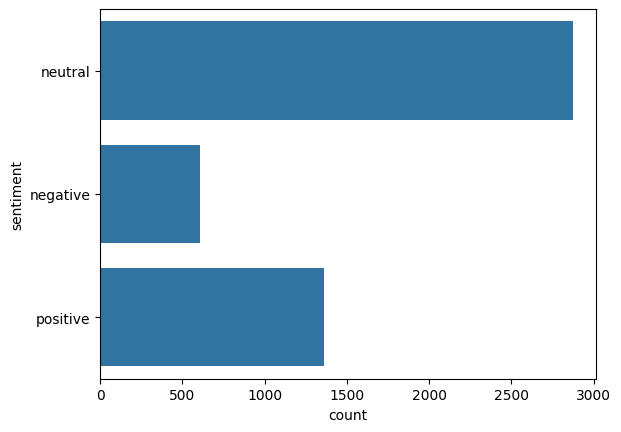

In [ ]:
sns.countplot(df.sentiment)

In [ ]:
df['sentiment'].value_counts()

sentiment
neutral     2871
positive    1362
negative     604
Name: count, dtype: int64

In [ ]:
df.head()

,sentiment,statement
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


Data Cleaning


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# all statements in lowercase
df.statement = df.statement.str.lower()
import string

# remove all punctuations from statement
df.statement = df.statement.str.translate(str.maketrans('', '', string.punctuation))
print(df)

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

df.statement = df.statement.apply(word_tokenize, args=('english',))

stop_words = set(stopwords.words('english'))  # Preload stopwords


def remove_stopwords(text):
    return [word for word in text if word not in stop_words]


df['statement'] = df['statement'].apply(remove_stopwords)


     sentiment                                          statement
0      neutral  technopolis plans to develop in stages an area...
1     negative  the international electronic industry company ...
2     positive  with the new production plant the company woul...
3     positive  according to the company s updated strategy fo...
4     positive  financing of aspocomp s growth aspocomp is agg...
...        ...                                                ...
4840  negative  london marketwatch  share prices ended lower i...
4841   neutral  rinkuskiai s beer sales fell by 65 per cent to...
4842  negative  operating profit fell to eur 354 mn from eur 6...
4843  negative  net sales of the paper segment decreased to eu...
4844  negative  sales in finland decreased by 105  in january ...

[4837 rows x 2 columns]


In [ ]:
df.head()

,sentiment,statement
0,neutral,"[technopolis, plans, develop, stages, area, le..."
1,negative,"[international, electronic, industry, company,..."
2,positive,"[new, production, plant, company, would, incre..."
3,positive,"[according, company, updated, strategy, years,..."
4,positive,"[financing, aspocomp, growth, aspocomp, aggres..."


In [ ]:
train,eva = train_test_split(df,test_size = 0.2)

Model

In [ ]:
# creating the model
from simpletransformers.classification import ClassificationModel


# Create a TransformerModel
model = ClassificationModel('bert', 'bert-base-cased', num_labels=3, args={'reprocess_input_data': True, 'overwrite_output_dir': True},use_cuda=False)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# 0,1,2 : positive,negative,neutral
def making_label(st):
    if(st=='positive'):
        return 0
    elif(st=='neutral'):
        return 2
    else:
        return 1

train['label'] = train['sentiment'].apply(making_label)
eva['label'] = eva['sentiment'].apply(making_label)
print(train.shape)

(3869, 3)


In [ ]:
train_df = pd.DataFrame({
    'text': train['statement'][:1500].replace(r'\n', ' ', regex=True),
    'label': train['label'][:1500]
})

eval_df = pd.DataFrame({
    'text': eva['statement'][-400:].replace(r'\n', ' ', regex=True),
    'label': eva['label'][-400:]
})

In [ ]:
train_df

,text,label
2857,"[country, germany, sector, constructionreal, e...",2
1027,"[implementing, software, finnish, army, aims, ...",0
3869,"[newly, created, position, established, streng...",0
3908,"[swedish, buyout, firm, sold, remaining, 224, ...",2
774,"[standardised, services, met, positive, recept...",0
...,...,...
173,"[operating, profit, turnover, sixmonth, period...",0
2673,"[restructuring, measures, affect, production, ...",2
285,"[aim, increase, sales, least, one, fifth, 2006]",0
617,"[4g, allows, customers, use, mobile, broadband...",0


Model Training and Evaluation

In [ ]:
model.train_model(train_df)
# this might take upto 30 minutes to execute

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:610: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 1 of 1:   0%|          | 0/188 [00:00<?, ?it/s]

(188, 0.7635787157936299)

In [ ]:
result, model_outputs, wrong_predictions = model.eval_model(eval_df)

/usr/local/lib/python3.10/dist-packages/simpletransformers/classification/classification_model.py:1453: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


0it [00:00, ?it/s]

Running Evaluation:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
result

{'mcc': 0.5328690112552421, 'eval_loss': 0.617169588804245}

In [ ]:
model_outputs

array([[-0.56516683, -2.01018929,  1.54390907],
       [-0.75480294, -1.93268561,  1.67496538],
       [-0.28927532, -2.10729933,  1.53246236],
       ...,
       [ 1.47210789, -1.51911163,  0.00240096],
       [-0.81417483, -1.87089407,  1.67653036],
       [-0.74303275, -1.93435585,  1.61619127]])

In [ ]:
lst = []
for arr in model_outputs:
    lst.append(np.argmax(arr))

In [ ]:
true = eval_df['label'].tolist()
predicted = lst

In [ ]:
import sklearn
mat = sklearn.metrics.confusion_matrix(true , predicted)
mat

array([[ 44,  10,  57],
       [  5,  39,   9],
       [  8,  13, 215]])

df_cm = pd.DataFrame(mat, range(3), range(3))

sns.heatmap(df_cm, annot=True)
plt.show()

In [ ]:
sklearn.metrics.classification_report(true,predicted,target_names=['positive','neutral','negative'])

'              precision    recall  f1-score   support\n\n    positive       0.77      0.40      0.52       111\n     neutral       0.63      0.74      0.68        53\n    negative       0.77      0.91      0.83       236\n\n    accuracy                           0.74       400\n   macro avg       0.72      0.68      0.68       400\nweighted avg       0.75      0.74      0.73       400\n'

In [ ]:
sklearn.metrics.accuracy_score(true,predicted)

0.745

Function to return the Sentiment of the input


In [ ]:
def get_result(statement):
    result = model.predict([statement])
    pos = np.where(result[1][0] == np.amax(result[1][0]))
    pos = int(pos[0])
    sentiment_dict = {0:'positive',1:'negative',2:'neutral'}
    print('The predicted sentiment is ', sentiment_dict[pos])
    return

In [ ]:
get_result(input())

market is crashing! inflation


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

The predicted sentiment is  negative


<ipython-input-65-5e50eab21c00>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pos = int(pos[0])
